In [1]:
#import libraries 
import pandas as pd

#Don't forget to install datareader from the terminal, pip 
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
import matplotlib.dates as mdates
print("Libraries imported")


Libraries imported


In [2]:
df = pdr.get_data_yahoo('^GSPC', '2013-05-01')

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-05-01,1597.550049,1581.280029,1597.550049,1582.699951,3530320000,1582.699951
2013-05-02,1598.599976,1582.770020,1582.770020,1597.589966,3366950000,1597.589966
2013-05-03,1618.459961,1597.599976,1597.599976,1614.420044,3603910000,1614.420044
2013-05-06,1619.770020,1614.209961,1614.400024,1617.500000,3062240000,1617.500000
2013-05-07,1626.030029,1616.640015,1617.550049,1625.959961,3309580000,1625.959961


In [4]:
dfClose = pd.DataFrame(df.Close)
dfClose.head()

,Close
Date,
2013-05-01,1582.699951
2013-05-02,1597.589966
2013-05-03,1614.420044
2013-05-06,1617.500000
2013-05-07,1625.959961


In [5]:
#fast moving average, set center =True, smooth it out so it lag a little bit
dfClose['MAFast'] = dfClose.Close.rolling(window=15, center=True).mean()
#fast_rolling.head()
dfClose['MAFast'].head()


Date
2013-05-01   NaN
2013-05-02   NaN
2013-05-03   NaN
2013-05-06   NaN
2013-05-07   NaN
Name: MAFast, dtype: float64

In [6]:
dfClose['MASlow'] = dfClose.Close.rolling(window=50, center=True).mean()
#slow_rolling.tail()

<function matplotlib.pyplot.show(*args, **kw)>

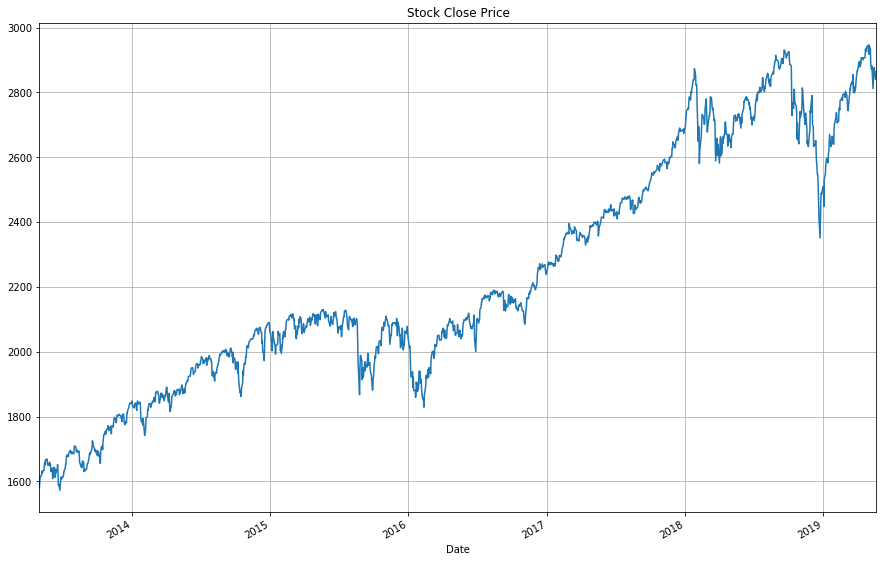

In [7]:
#plot the close price
plt.figure(figsize=(15,10))
dfClose['Close'].plot(grid =True)
plt.title("Stock Close Price")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

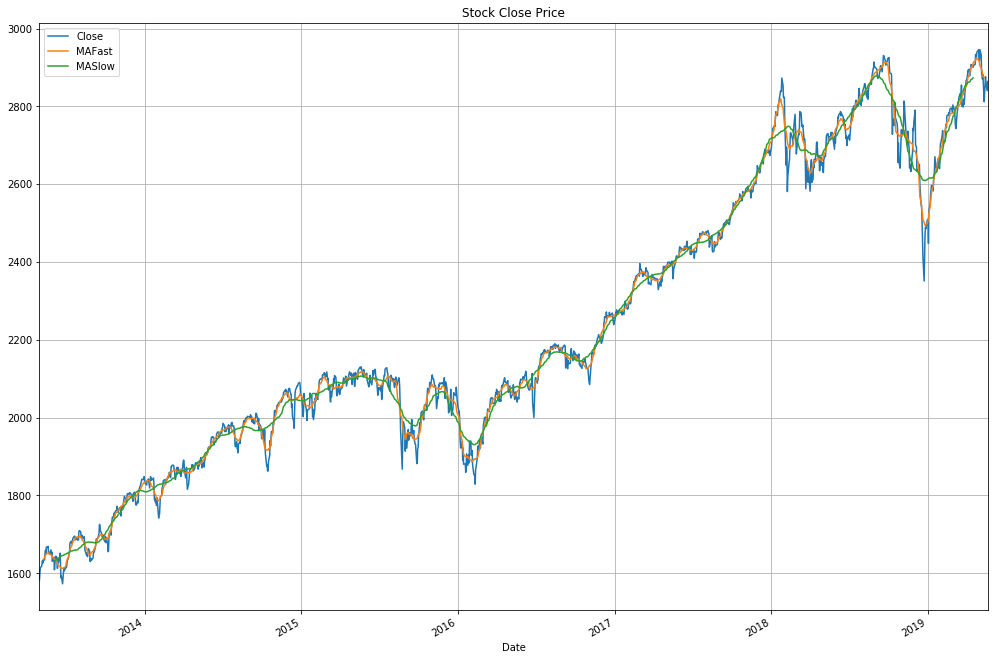

In [8]:
#plot the close price and MAs
plt.figure(figsize=(17,12))
dfClose['Close'].plot(grid =True)
dfClose['MAFast'].plot(grid =True)
dfClose['MASlow'].plot(grid =True)
plt.title("Stock Close Price")
plt.legend(loc=2)
plt.show

### Caculate RSI

- RSI = 100 - 100 / (1 + RS)

- RS = Average gain of last 14 trading days / Average loss of last 14 trading days

#### we need a dataframe which contains: Date, Close, Change, Gain, Loss, Avg Gain, Avg Loss, RS, RS14

In [9]:
dfClose.head()

,Close,MAFast,MASlow
Date,,,
2013-05-01,1582.699951,NaN,NaN
2013-05-02,1597.589966,NaN,NaN
2013-05-03,1614.420044,NaN,NaN
2013-05-06,1617.500000,NaN,NaN
2013-05-07,1625.959961,NaN,NaN


In [10]:
dfClose['Change'] = dfClose['Close']-dfClose['Close'].shift()

In [11]:
dfClose.head()

,Close,MAFast,MASlow,Change
Date,,,,
2013-05-01,1582.699951,NaN,NaN,NaN
2013-05-02,1597.589966,NaN,NaN,14.890015
2013-05-03,1614.420044,NaN,NaN,16.830078
2013-05-06,1617.500000,NaN,NaN,3.079956
2013-05-07,1625.959961,NaN,NaN,8.459961


In [12]:
#Create Gain column
dfClose['Gain'] = dfClose.loc[dfClose['Change'] > 0, 'Change']

In [13]:
dfClose.head(3)

,Close,MAFast,MASlow,Change,Gain
Date,,,,,
2013-05-01,1582.699951,NaN,NaN,NaN,NaN
2013-05-02,1597.589966,NaN,NaN,14.890015,14.890015
2013-05-03,1614.420044,NaN,NaN,16.830078,16.830078


In [19]:
#Create Loss column
dfClose['Loss'] = abs(dfClose.loc[dfClose['Change'] < 0, 'Change'])

In [20]:
dfClose.head(3)

,Close,MAFast,MASlow,Change,Gain,Loss,AvgGain,AvgLoss,RS,RSI
Date,,,,,,,,,,
2013-05-01,1582.699951,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2013-05-02,1597.589966,0.0,0.0,14.890015,14.890015,NaN,NaN,NaN,NaN,NaN
2013-05-03,1614.420044,0.0,0.0,16.830078,16.830078,NaN,NaN,NaN,NaN,NaN


In [21]:
#Create Average Gain & Average Loss
dfClose = dfClose.replace(np.nan,0, regex=True)
dfClose['AvgGain'] = dfClose.Gain.rolling(window=14, center=True).mean()
dfClose['AvgLoss'] = dfClose.Loss.rolling(window=14, center=True).mean()
dfClose.head(10)


,Close,MAFast,MASlow,Change,Gain,Loss,AvgGain,AvgLoss,RS,RSI
Date,,,,,,,,,,
2013-05-01,1582.699951,0.000000,0.0,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
2013-05-02,1597.589966,0.000000,0.0,14.890015,14.890015,0.000000,NaN,NaN,0.000000,0.000000
2013-05-03,1614.420044,0.000000,0.0,16.830078,16.830078,0.000000,NaN,NaN,0.000000,0.000000
2013-05-06,1617.500000,0.000000,0.0,3.079956,3.079956,0.000000,NaN,NaN,0.000000,0.000000
2013-05-07,1625.959961,0.000000,0.0,8.459961,8.459961,0.000000,NaN,NaN,0.000000,0.000000
2013-05-08,1632.689941,0.000000,0.0,6.729980,6.729980,0.000000,NaN,NaN,0.000000,0.000000
2013-05-09,1626.670044,0.000000,0.0,-6.019897,0.000000,6.019897,NaN,NaN,0.000000,0.000000
2013-05-10,1633.699951,1635.167326,0.0,7.029907,7.029907,0.000000,7.078570,1.107849,-6.389471,-18.554697
2013-05-13,1633.770020,1640.010661,0.0,0.070068,0.070068,0.000000,7.283569,1.107849,-6.574514,-17.938784


### RS = Average Gain / Average Loss

In [22]:
dfClose['RS']= dfClose['AvgGain']/dfClose['AvgLoss']
dfClose.head(20)

,Close,MAFast,MASlow,Change,Gain,Loss,AvgGain,AvgLoss,RS,RSI
Date,,,,,,,,,,
2013-05-01,1582.699951,0.000000,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
2013-05-02,1597.589966,0.000000,0.0,14.890015,14.890015,0.000000,NaN,NaN,NaN,0.000000
2013-05-03,1614.420044,0.000000,0.0,16.830078,16.830078,0.000000,NaN,NaN,NaN,0.000000
2013-05-06,1617.500000,0.000000,0.0,3.079956,3.079956,0.000000,NaN,NaN,NaN,0.000000
2013-05-07,1625.959961,0.000000,0.0,8.459961,8.459961,0.000000,NaN,NaN,NaN,0.000000
2013-05-08,1632.689941,0.000000,0.0,6.729980,6.729980,0.000000,NaN,NaN,NaN,0.000000
2013-05-09,1626.670044,0.000000,0.0,-6.019897,0.000000,6.019897,NaN,NaN,NaN,0.000000
2013-05-10,1633.699951,1635.167326,0.0,7.029907,7.029907,0.000000,7.078570,1.107849,6.389471,-18.554697
2013-05-13,1633.770020,1640.010661,0.0,0.070068,0.070068,0.000000,7.283569,1.107849,6.574514,-17.938784


#### RSI = 100 - (100/(1-RS))

In [24]:
dfClose['RSI'] = 100-100/(1+dfClose['RS'])
dfClose.head(20)

,Close,MAFast,MASlow,Change,Gain,Loss,AvgGain,AvgLoss,RS,RSI
Date,,,,,,,,,,
2013-05-01,1582.699951,0.000000,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2013-05-02,1597.589966,0.000000,0.0,14.890015,14.890015,0.000000,NaN,NaN,NaN,NaN
2013-05-03,1614.420044,0.000000,0.0,16.830078,16.830078,0.000000,NaN,NaN,NaN,NaN
2013-05-06,1617.500000,0.000000,0.0,3.079956,3.079956,0.000000,NaN,NaN,NaN,NaN
2013-05-07,1625.959961,0.000000,0.0,8.459961,8.459961,0.000000,NaN,NaN,NaN,NaN
2013-05-08,1632.689941,0.000000,0.0,6.729980,6.729980,0.000000,NaN,NaN,NaN,NaN
2013-05-09,1626.670044,0.000000,0.0,-6.019897,0.000000,6.019897,NaN,NaN,NaN,NaN
2013-05-10,1633.699951,1635.167326,0.0,7.029907,7.029907,0.000000,7.078570,1.107849,6.389471,86.467231
2013-05-13,1633.770020,1640.010661,0.0,0.070068,0.070068,0.000000,7.283569,1.107849,6.574514,86.797832


<function matplotlib.pyplot.show(*args, **kw)>

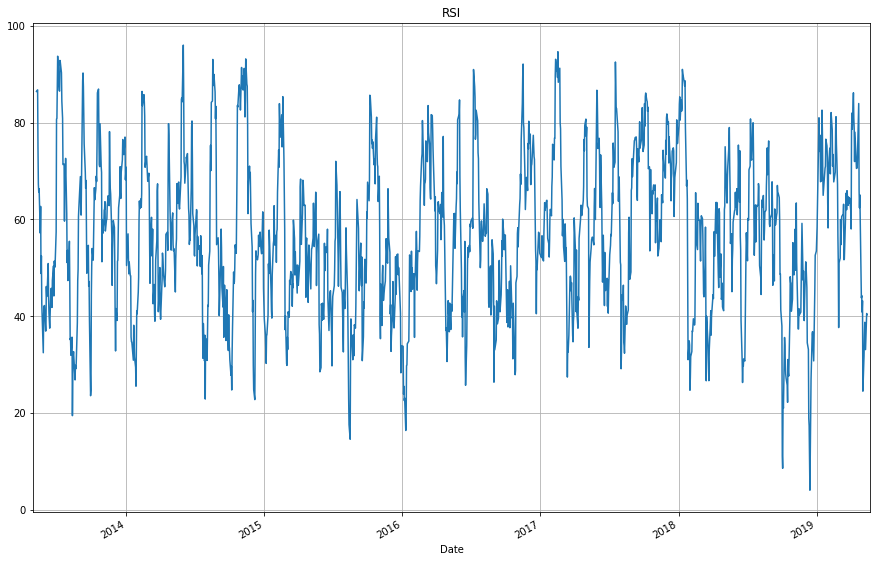

In [27]:
#plot the close price
plt.figure(figsize=(15,10))
#dfClose['Close'].plot(grid =True)
dfClose['RSI'].plot(grid =True)
plt.title("RSI")
plt.show